In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf 
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

In [46]:
data = pd.read_csv("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\2017-2022.csv", parse_dates=['Tanggal'], date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))

C:\Users\wajit\AppData\Local\Temp\ipykernel_8764\3508010389.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\2017-2022.csv", parse_dates=['Tanggal'], date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))


In [47]:
print(data)

        Tanggal OriginTime  Latitude  Longitude  Kedalaman (km)  Magnitude  \
0    2017-01-01   04:58:14   -8.9300   110.0500            10.0        4.0   
1    2017-01-01   06:43:49   -9.2800   113.8700            10.0        3.0   
2    2017-01-01   10:27:23   -9.0400   112.8700            10.0        3.3   
3    2017-01-01   15:18:49  -10.4600   112.5400            10.0        3.4   
4    2017-01-02   21:02:24   -8.9400   108.7500            10.0        5.3   
...         ...        ...       ...        ...             ...        ...   
6144 2022-12-31   09:10:44   -8.3038   109.0606            38.0        2.8   
6145 2022-12-31   12:40:34  -10.5269   112.1858            10.0        4.3   
6146 2022-12-31   15:01:21   -8.8896   112.4811            41.0        3.1   
6147 2022-12-31   17:21:53  -10.4633   113.1895            10.0        3.8   
6148 2022-12-31   18:13:14   -8.8052   109.5594            29.0        3.0   

     Type                                         Keterangan Di

In [48]:
data.describe()

,Tanggal,Latitude,Longitude,Kedalaman (km),Magnitude
count,6149,6149.000000,6149.000000,6149.000000,6149.000000
mean,2020-12-18 02:18:38.230606592,-8.879588,111.311699,30.002895,3.142739
min,2017-01-01 00:00:00,-12.690000,108.200000,1.000000,0.900000
25%,2019-06-09 00:00:00,-9.300000,110.370000,10.000000,2.800000
50%,2021-09-08 00:00:00,-8.881300,111.070000,14.000000,3.100000
75%,2022-07-12 00:00:00,-8.430000,112.720000,29.000000,3.500000
max,2022-12-31 00:00:00,0.767800,114.000000,715.000000,6.600000
std,NaN,0.838015,1.396364,51.434214,0.670986


In [49]:
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%H:%M:%S')
latitude = data["Latitude"]
longitude = data["Longitude"]
kedalaman = data["Kedalaman (km)"]
magnitude = data["Magnitude"]

In [50]:
checkpoint = ModelCheckpoint('C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\checkpoints\\model_1.h5', monitor='val_mae', verbose=1, save_best_only=True)

In [51]:
gempa_semua = []
for index in range(len(latitude)):
  gempa = []
  gempa.append(latitude[index])
  gempa.append(longitude[index])
  gempa.append(kedalaman[index])

  gempa_semua.append(gempa)

In [52]:
gempa_semua = np.array(gempa_semua)

In [53]:
print(gempa_semua)

[[ -8.93   110.05    10.    ]
 [ -9.28   113.87    10.    ]
 [ -9.04   112.87    10.    ]
 ...
 [ -8.8896 112.4811  41.    ]
 [-10.4633 113.1895  10.    ]
 [ -8.8052 109.5594  29.    ]]


In [54]:
magnitude = magnitude.astype('float64')

In [55]:
magnitude.dtype

dtype('float64')

In [56]:
X_train, X_test, y_train, y_test = train_test_split(gempa_semua, magnitude, test_size=0.2, random_state=42)

In [57]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,),  kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                256       
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 128)               8320      
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_7 (Batc  (None, 128)              512       
 hNormalization)                                      

In [58]:
optimizer = Adam(learning_rate=0.001)

In [59]:
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [60]:
history = model.fit(X_train, y_train, batch_size=64, epochs=3000, verbose=1, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/3000
66/77 [========================>.....] - ETA: 0s - loss: 2.5829 - mae: 1.3074
Epoch 1: val_mae improved from inf to 1.07188, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_1.h5
77/77 [==============================] - 2s 5ms/step - loss: 2.3569 - mae: 1.2315 - val_loss: 1.5332 - val_mae: 1.0719
Epoch 2/3000
69/77 [=========================>....] - ETA: 0s - loss: 0.8034 - mae: 0.6964
Epoch 2: val_mae improved from 1.07188 to 0.71143, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_1.h5
77/77 [==============================] - 0s 3ms/step - loss: 0.7926 - mae: 0.6907 - val_loss: 0.7977 - val_mae: 0.7114
Epoch 3/3000
73/77 [===========================>..] - ETA: 0s - loss: 0.6761 - mae: 0.6290
Epoch 3: val_mae improved from 0.71143 to 0.64352, saving model to C:\Users\wajit\Documents\GitHub\Project-ANN\checkpoints\model_1.h5
77/77 [==============================] - 0s 3ms/step - loss: 0.6729 - mae: 0.6277 - val_los

In [61]:
model = load_model("C:\\Users\\wajit\\Documents\\GitHub\\Project-ANN\\checkpoints\\model_1.h5")
accuracy = model.evaluate(X_test, y_test)[1]
accuracy_percentage =accuracy * 100
print("Loss: ", accuracy_percentage)

39/39 [==============================] - 0s 2ms/step - loss: 0.2858 - mae: 0.3823
Loss:  38.22621703147888


In [62]:
latitude_subset = latitude[:100]
longitude_subset = longitude[:100]
kedalaman_subset = kedalaman[:100]

In [63]:
count = 0  # Variable to count the number of predicted data
predictions = []  # List to store the predicted values

for i in range(len(latitude)):
    for j in range(len(longitude)):
        for k in range(len(kedalaman)):
            koordinat_latitude = float(latitude[i])
            koordinat_longitude = float(longitude[j])
            kedalaman_gempa = float(kedalaman[k])

            input_data = np.array([[koordinat_latitude, koordinat_longitude, kedalaman_gempa]])
            hasil_prediksi = model.predict(input_data)

            # Append the predicted value to the list
            predictions.append(hasil_prediksi)

            # Increase the count by 1
            count += 1

            # Print the prediction
            print("Perkiraan kekuatan gempa {} Mg".format(hasil_prediksi))

            if count == 6149:
                break
        else:
            continue
        break
    else:
        continue
    break

# Convert the list of predictions to a NumPy array
predictions = np.array(predictions)

print("Banyaknya data yang diprediksi:", count)


1/1 [==============================] - 0s 174ms/step
Perkiraan kekuatan gempa [[3.1225598]] Mg
1/1 [==============================] - 0s 27ms/step
Perkiraan kekuatan gempa [[3.1225598]] Mg
1/1 [==============================] - 0s 26ms/step
Perkiraan kekuatan gempa [[3.1225598]] Mg
1/1 [==============================] - 0s 27ms/step
Perkiraan kekuatan gempa [[3.1225598]] Mg
1/1 [==============================] - 0s 26ms/step
Perkiraan kekuatan gempa [[3.1225598]] Mg
1/1 [==============================] - 0s 28ms/step
Perkiraan kekuatan gempa [[3.1225598]] Mg
1/1 [==============================] - 0s 26ms/step
Perkiraan kekuatan gempa [[3.1225598]] Mg
1/1 [==============================] - 0s 30ms/step
Perkiraan kekuatan gempa [[3.1439145]] Mg
1/1 [==============================] - 0s 25ms/step
Perkiraan kekuatan gempa [[3.1225598]] Mg
1/1 [==============================] - 0s 26ms/step
Perkiraan kekuatan gempa [[3.1225598]] Mg
1/1 [==============================] - 0s 33ms/step
Perkira

In [64]:
#koordinat_latitude = float(input("Masukkan koordinat latitude anda : "))
#koordinat_longitude = float(input("Masukkan koordinat longitude anda: "))
#kedalaman_gempa = float(input("Masukkan Kedalaman Gempa dalam (Km): "))

In [65]:
#prediksi_gempa = model.predict([[koordinat_latitude, koordinat_longitude, kedalaman_gempa]])
#print("Perkiraan kekuatan gempa {} Mg".format(prediksi_gempa))

In [66]:
print(predictions)

[[[3.1225598]]

 [[3.1225598]]

 [[3.1225598]]

 ...

 [[3.1760056]]

 [[3.1225598]]

 [[3.1574016]]]


In [67]:
flattened_array = predictions.flatten()

In [68]:
magnitude_subset = magnitude[:100]

In [69]:
print(magnitude_subset)

0     4.0
1     3.0
2     3.3
3     3.4
4     5.3
     ... 
95    3.5
96    2.4
97    4.0
98    3.1
99    5.0
Name: Magnitude, Length: 100, dtype: float64


In [70]:
x = data['Tanggal']
y_data_asli = magnitude
y_data_forecasted = flattened_array

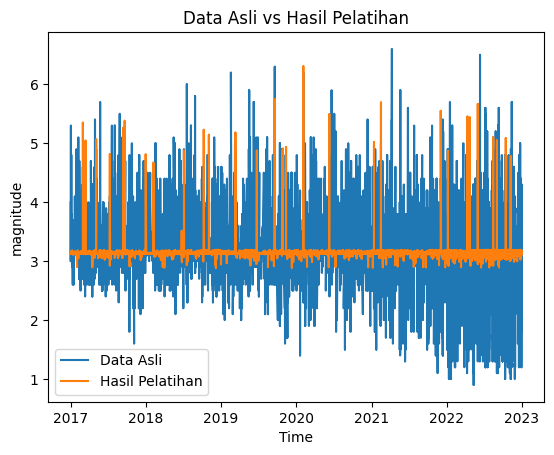

In [71]:
plt.plot(x, y_data_asli, label='Data Asli')
plt.plot(x, y_data_forecasted, label='Hasil Pelatihan')
plt.xlabel('Time')
plt.ylabel('magnitude')
plt.title('Data Asli vs Hasil Pelatihan')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.legend()
plt.show()

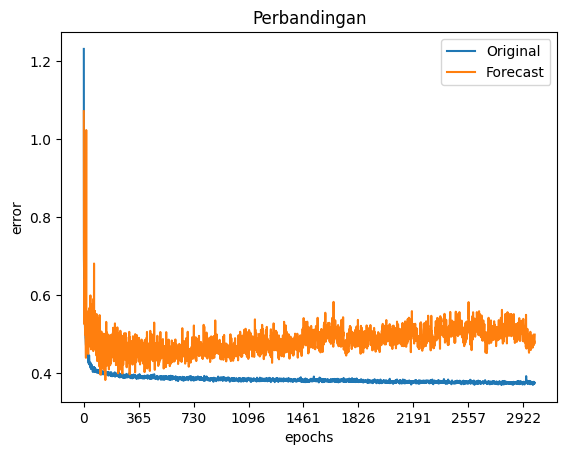

In [72]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.xlabel('epochs')
plt.ylabel('error')
plt.title('Perbandingan')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.legend(['Original', 'Forecast'], loc='upper right')
plt.show()